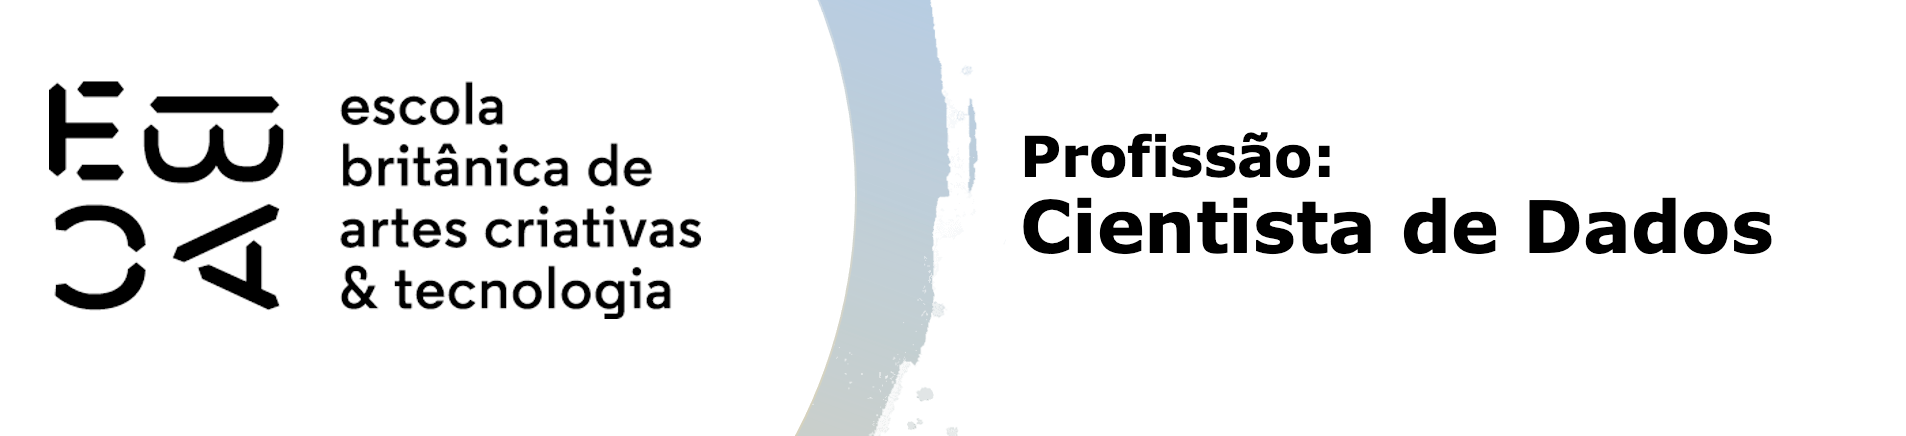

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
import scipy.stats as ss
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('previsao_de_renda_II.csv')
df1 = df.copy()
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [16]:
df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

In [17]:
df = df.iloc[:, 2:]
df.shape

(750000, 12)

In [18]:
train = df.iloc[:500000, :]
test = df.iloc[500000:, :]

In [19]:
train.shape, test.shape

((500000, 12), (250000, 12))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   sexo                   750000 non-null  object 
 1   posse_de_veiculo       750000 non-null  object 
 2   posse_de_imovel        750000 non-null  object 
 3   qtd_filhos             750000 non-null  int64  
 4   tipo_renda             750000 non-null  object 
 5   educacao               750000 non-null  object 
 6   estado_civil           750000 non-null  object 
 7   tipo_residencia        750000 non-null  object 
 8   idade                  750000 non-null  int64  
 9   tempo_emprego          750000 non-null  float64
 10  qt_pessoas_residencia  750000 non-null  float64
 11  renda                  750000 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 68.7+ MB


In [21]:
reg = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia', data=train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                 1.638e+04
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:18:00   Log-Likelihood:            -6.6308e+05
No. Observations:              500000   AIC:                         1.326e+06
Df Residuals:                  499975   BIC:                         1.326e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               7.7441      0.052    147.664      0.000       7.641       7.847
sexo[T.M]                               0.1411      0.003     46.317      0.000       0.135       0.147
posse_de_veiculo[T.S]                  -0.0014      0.003     -0.466      0.641      -0.007       0.004
posse_de_imovel[T.S]                    0.1855      0.003     65.481      0.000       0.180       0.191
C(tipo_renda)[T.Bolsista]              -0.2460      0.058     -4.233      0.000      -0.360      -0.132
C(tipo_renda)[T.Empresário]             0.1382      0.003     42.283      0.000       0.132       0.145
C(tipo_renda)[T.Pensionista]           -0.2999      0.005    -64.316      0.000      -0.309      -0.291
C(tipo_renda)[T.Servidor público]       0.1234      0.005     25.672      0.000       0.114       0.133
C(educacao)[T.Médio]                    0.0203      0.012      1.665      0.096      -0.004       0.044
C(educacao)[T.Pós graduação]            0.1750      0.041      4.216      0.000       0.094       0.256
C(educacao)[T.Superior completo]        0.1833      0.012     14.819      0.000       0.159       0.208
C(educacao)[T.Superior incompleto]      0.0612      0.014      4.427      0.000       0.034       0.088
C(estado_civil)[T.Separado]             0.1624      0.025      6.413      0.000       0.113       0.212
C(estado_civil)[T.Solteiro]             0.1458      0.025      5.867      0.000       0.097       0.195
C(estado_civil)[T.União]                0.0131      0.005      2.653      0.008       0.003       0.023
C(estado_civil)[T.Viúvo]                0.1580      0.026      6.172      0.000       0.108       0.208
C(tipo_residencia)[T.Casa]             -0.0955      0.011     -8.577      0.000      -0.117      -0.074
C(tipo_residencia)[T.Com os pais]      -0.0635      0.013     -5.037      0.000      -0.088      -0.039
C(tipo_residencia)[T.Comunitário]      -0.1697      0.022     -7.581      0.000      -0.214      -0.126
C(tipo_residencia)[T.Estúdio]          -0.1437      0.019     -7.637      0.000      -0.181      -0.107
C(tipo_residencia)[T.Governamental]    -0.0902      0.013     -6.807      0.000      -0.116      -0.064
qtd_filhos                             -0.1373      0.025     -5.546      0.000      -0.186      -0.089
idade                                   0.0047      0.000     27.587      0.000       0.004       0.005
tempo_emprego                           0.1288      0.000    566.717      0.000       0.128       0.129
qt_pessoas_residencia                   0.1430      0.025      5.789      0.000       0.095       0.191
==============================================================================
Omnibus:                     1948.632   Durbin-Watson:                   1.242
Prob(Omnibus)

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

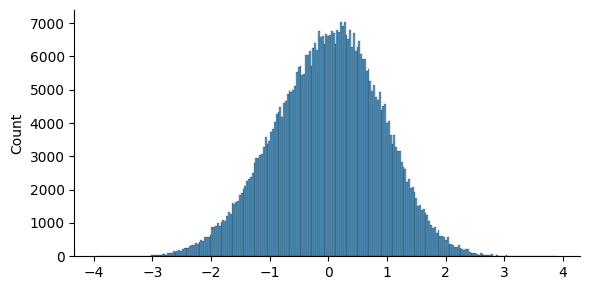

In [22]:
sns.displot(reg.resid, height=3, aspect=2);

#### Bem próximo de uma distribuição normal

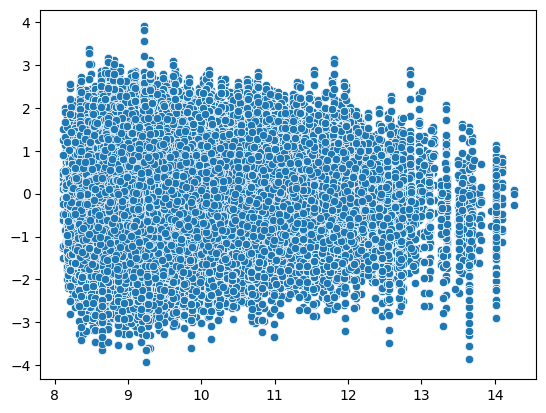

In [23]:
#Valores preditos x resíduos
sns.scatterplot(x = reg.predict(), y = reg.resid);

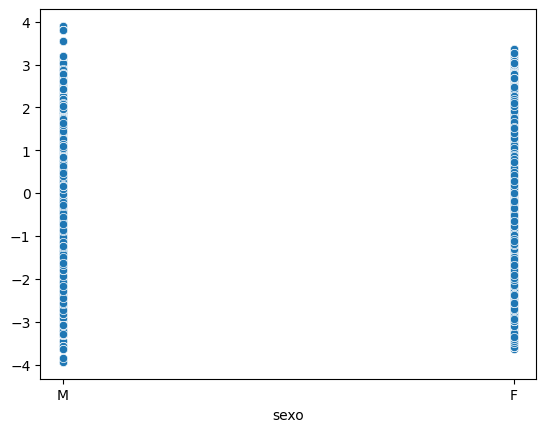

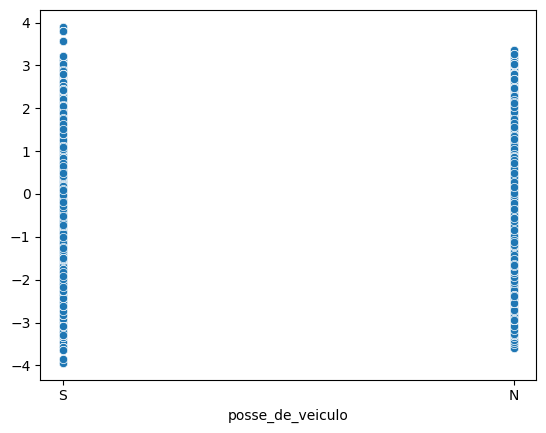

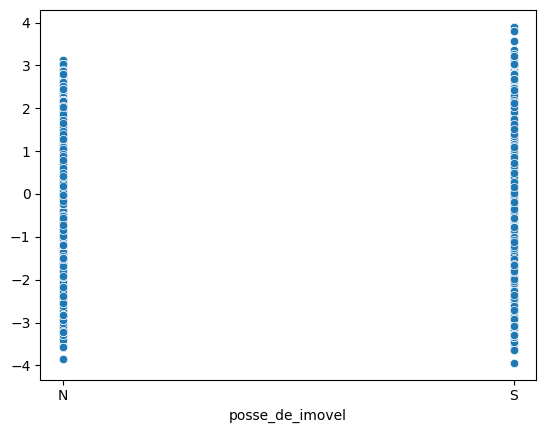

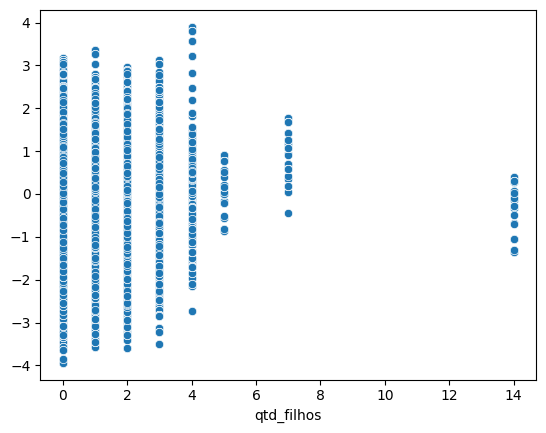

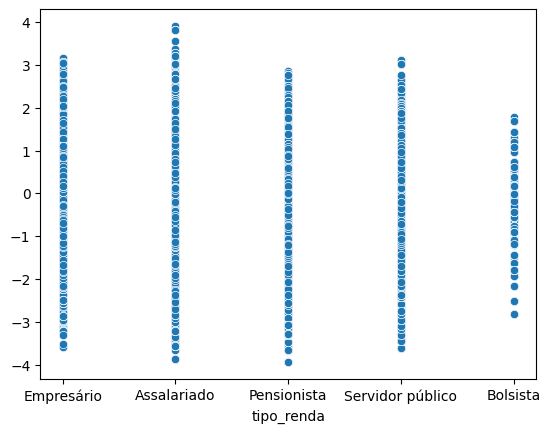

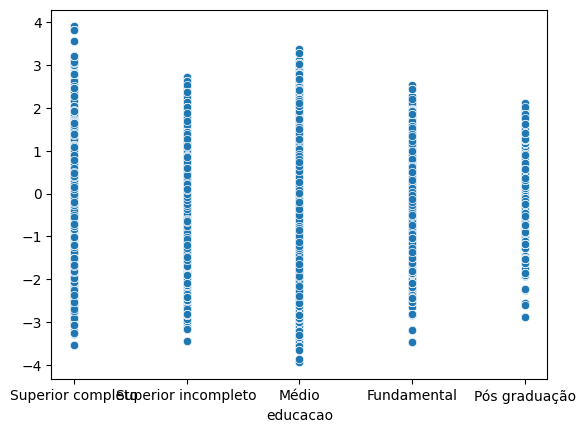

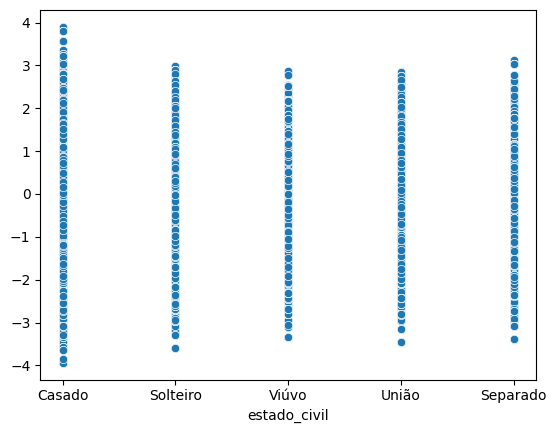

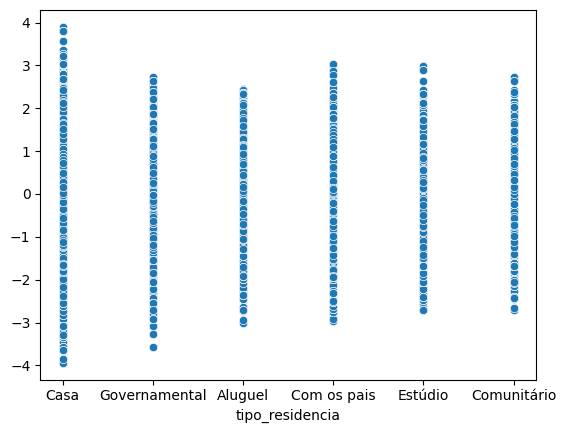

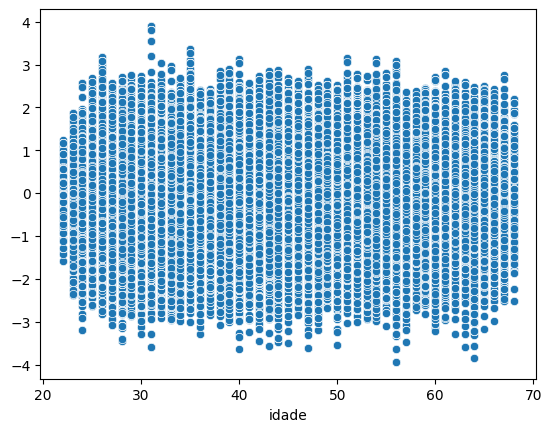

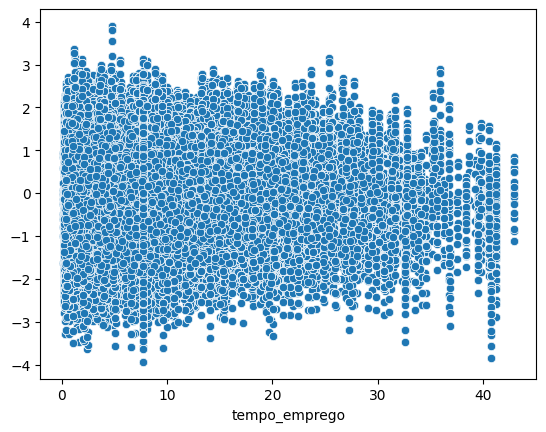

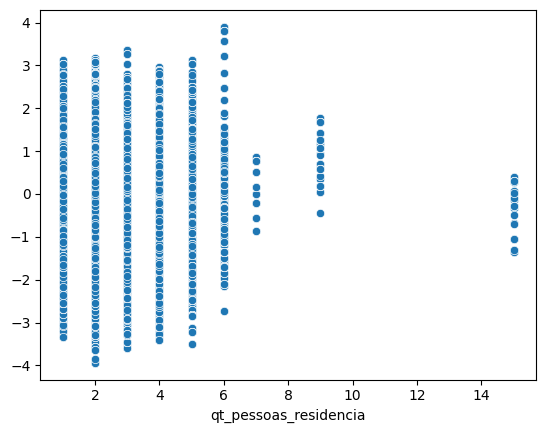

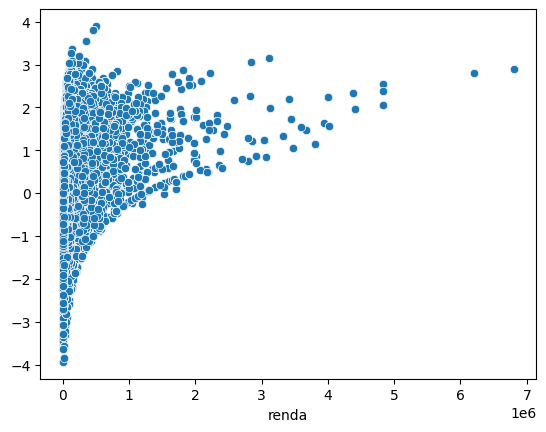

In [25]:
#Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo

for i in train.columns:
    sns.scatterplot(x = train[i], y = reg.resid)
    plt.show();

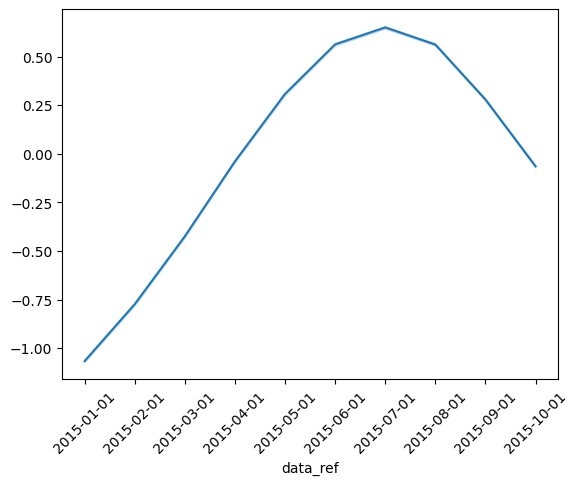

In [26]:
# Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
#plt.figure(figsize=(12,8))
ax = sns.lineplot(x=df1['data_ref'], y=reg.resid);
plt.xticks(rotation=45);

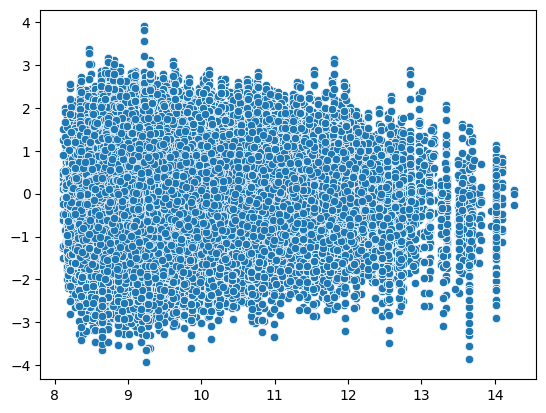

In [27]:
# Avalie se a variância da variável resposta parece ser conforme os valores previstos.
sns.scatterplot(x = reg.predict(), y = reg.resid);

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

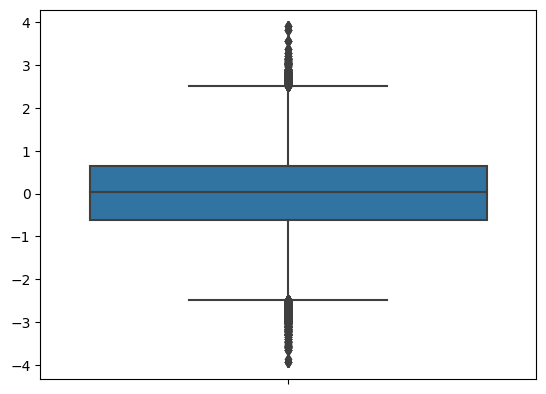

In [28]:
sns.boxplot(y=reg.resid, data=train);

## Não consigo verificar os studentized residuals, pois ele fica processando infinitamente.

In [ ]:
fig = sm.graphics.influence_plot(reg, criterion="cooks")
fig.tight_layout(pad=1.0)

In [ ]:
st_res = reg.outlier_test()
sns.scatterplot(x = reg.predict(), y = st_res.student_resid);

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

In [30]:
train_m = train.drop('renda', axis=1)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia
0,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0
1,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0
2,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0
3,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0
4,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0
...,...,...,...,...,...,...,...,...,...,...,...
499995,F,N,S,0,Empresário,Superior completo,Casado,Casa,46,3.863014,2.0
499996,F,N,S,0,Empresário,Médio,Casado,Casa,62,7.619178,2.0
499997,F,N,S,0,Assalariado,Médio,Casado,Casa,43,0.594521,2.0
499998,M,S,S,2,Assalariado,Superior completo,Casado,Casa,35,4.383562,4.0


In [31]:
train.shape

(500000, 12)

In [35]:
train_m.corr(method='spearman')

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia
qtd_filhos,1.000000,-0.415289,-0.090313,0.828626
idade,-0.415289,1.000000,0.301265,-0.350348
tempo_emprego,-0.090313,0.301265,1.000000,-0.058834
qt_pessoas_residencia,0.828626,-0.350348,-0.058834,1.000000


#### Nas variáveis numéricas, é possível notar que a qt_pessoas_residência, tem uma boa correlação com qtd_filhos, mas já era de se esperar, o resto não apresenta uma correlação forte

In [36]:
# VIF
train_dum = pd.get_dummies(train_m, drop_first=True)

In [39]:
vif(train_dum.values, 2)

3.024360537467698

In [40]:
vars_vif = pd.DataFrame()
vars_vif['VIF Factor'] = [vif(train_dum, i) for i in range(train_dum.shape[1])]
vars_vif['Feature'] = train_dum.columns

vars_vif.round(2)

,VIF Factor,Feature
0,34.74,qtd_filhos
1,34.77,idade
2,3.02,tempo_emprego
3,242.58,qt_pessoas_residencia
4,1.82,sexo_M
5,1.97,posse_de_veiculo_S
6,3.24,posse_de_imovel_S
7,1.00,tipo_renda_Bolsista
8,1.48,tipo_renda_Empresário
9,2.20,tipo_renda_Pensionista


### qt_pessoas_residencia ficou com um VIF super alto, ela ta sendo super explicada.

In [41]:
train_m_2 = train_m.drop('qt_pessoas_residencia', axis=1)
train_dum = pd.get_dummies(train_m_2, drop_first=True)

In [43]:
vars_vif = pd.DataFrame()
vars_vif['VIF Factor'] = [vif(train_dum, i) for i in range(train_dum.shape[1])]
vars_vif['Feature'] = train_dum.columns

vars_vif.round(2)

,VIF Factor,Feature
0,1.58,qtd_filhos
1,30.92,idade
2,3.02,tempo_emprego
3,1.80,sexo_M
4,1.97,posse_de_veiculo_S
5,3.22,posse_de_imovel_S
6,1.00,tipo_renda_Bolsista
7,1.47,tipo_renda_Empresário
8,2.17,tipo_renda_Pensionista
9,1.21,tipo_renda_Servidor público


## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

#### Não farei nenhum ajuste, pois não consegui ver a influência dos pontos considerados outliers